# 科学计算神器之numpy-1

> * 这个系列主要集中在python做科学计算的Numpy、Scipy等库，当然原汁原味的知识才是最好的，请查看https://docs.scipy.org/
> * Numpy系列包含ndarray、ufunc、矩阵运算和文件存取

Numpy主要包含两种数据结构：Array和Matrix，以及对应的的Ufunc函数

## 1. 安装numpy

```shell
#终端命令 或用canda，已包含numpy、scipy等
sudo pip install numpy
```

## 2. 导入numpy

In [107]:
import numpy as np

## 3. 创建对象
Numpy最主要的对象是均匀的多维数组，我们可以通过给array函数传递Python的序列对象创建数组，如果传递的是多层嵌套的序列，将创建多维数组。Numpy的array类叫做ndarray，也就是通常说的array，numpy.array与python的array.array是不同的，它仅提供一维数组和少量函数。

#### 3.1 ndarray最常用的属性
* ndarray.ndim  
        —array的维数，及数组维数，python中被称为秩rank
* ndarray.shape     
        —array的每个维度的长度，及各个维度数组的长度，是一个tuple，eg:(4, 5),tuple的长度即为rank

* ndarray.size 
        —array的元素个数

* ndarray.dtype  
        —array元素的类型，常见的numpy.int64, numpy.int32, numpy.int16, numpy.float64, Numpy默认数据类型为numpy.int64(不同版本会有区别)
* ndarray.itemsize    
        —array元素的字节长，例如，float64为8字节（=64/8），complex32为4字节 (=32/8). 它等同于ndarray.dtype.itemsize.
* ndarray.data    
        —缓存中存有的实际array元素，一般不用这个属性对array进行索引取值

In [108]:
# 采用python list, numpy默认dtype为int64，默认的dtype不显示
a = np.array([[1, 2, 3], [4, 5, 6]])  
a

array([[1, 2, 3],
       [4, 5, 6]])

In [109]:
# 下面返回一个tuple
a.ndim, a.shape, a.size, a.dtype, a.itemsize

(2, (2, 3), 6, dtype('int64'), 8)

In [110]:
 a.data

<read-write buffer for 0x7f79d8655c60, size 48, offset 0 at 0x7f79d8647e30>

In [111]:
# 利用reshape函数可以修改array尺寸产生新array，总elements不变
a.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### 3.2 创建array对象—根据python序列对象和数据类型创建

In [112]:
# 一种参考3.1的例子，第二种是python对象： list + float
b = np.array([[1, 2, 3], [4, 5, 6.0]])  
b

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [113]:
# python tuple + float
np.array((1, 2, 3.1))   

array([ 1. ,  2. ,  3.1])

In [114]:
# python 混合对象 list+tuple
np.array(([1, 2, 3], (4, 5, 6)))  

array([[1, 2, 3],
       [4, 5, 6]])

In [115]:
# 创建2维array对象，Minimum dimensions 2，等同 np.array([[1, 2, 3]])
np.array([1, 2, 3], ndmin=2)   

array([[1, 2, 3]])

In [116]:
# 复数类型
np.array([1, 2, 3], dtype=complex)

array([ 1.+0.j,  2.+0.j,  3.+0.j])

In [117]:
# 自定义数据类型 字节顺序：>为big-edian <为little-endian， i4:int32,及4个字节
x = np.array([(1, 2), (3, 4), (5, 6)],dtype=[('a','<i4'),('b','<i8')])
x['a']

array([1, 3, 5], dtype=int32)

In [118]:
# Numpy默认类型为int64
x['b']

array([2, 4, 6])

In [119]:
x['b'].dtype

dtype('int64')

#### 3.3 创建matrix对象 / matrix转为array对象

In [120]:
# 同样可以用 python对象来创建
np.mat([(1,2),(3,4)])

matrix([[1, 2],
        [3, 4]])

In [121]:
# ！可以用数值字符串创建matrix， 并将其转为array对象
np.array(np.mat('1 2; 3 4'))

array([[1, 2],
       [3, 4]])

In [122]:
# 用数值字符串创建array,整体仍为字符类型的一个元素
np.array(('1 2;3 4', 'a'))

array(['1 2;3 4', 'a'],
      dtype='|S7')

In [123]:
# 仍为matrix对象
np.array(np.mat('1 2; 3 4'), subok=True)

matrix([[1, 2],
        [3, 4]])

#### 3.4 利用函数创建array对象
Numpy专门提供了很多函数来创建数组，常用的有arange、linspace、logspace、zeros、ones、empty等函数通过数值创建数组(类同matlab)，以及frombuffer, fromstring, fromfile等函数可以从字节序列创建数组，还可以通过fromfunction来通过函数创建数组.

##### 3.4.1 通过arange、linspace、logspace等函数创建数组
arange与linspace最主要的区别是，arange第三个参数为step，linspace/logspace第三个参数为元素个数
* arange函数类似于python的range函数，通过指定开始值、终值和步长来创建一维数组，注意数组不包括终值:

In [124]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

* linspace函数通过指定开始值、终值和元素个数来创建一维数组，可以通过endpoint关键字指定是否包括终值，缺省设置是包括终值:

In [132]:
# linspace在生成数组需计算好数组的size，生成类似range步长的数组通常size比range()的大1,
# 或者将终值设为range()终值-step. 最后一个等同于 np.arange(0, 1, 0.1)
np.linspace(0, 1, 10), np.linspace(0, 1, 11), np.linspace(0, 0.9, 10)

(array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
         0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]))

* logspace函数和linspace类似，不过它创建等比数列，下面的例子产生1(10^0)到100(10^2)、有20个元素的等比数列:

In [126]:
np.logspace(0, 2, 20)

array([   1.        ,    1.27427499,    1.62377674,    2.06913808,
          2.6366509 ,    3.35981829,    4.2813324 ,    5.45559478,
          6.95192796,    8.8586679 ,   11.28837892,   14.38449888,
         18.32980711,   23.35721469,   29.76351442,   37.92690191,
         48.32930239,   61.58482111,   78.47599704,  100.        ])

In [137]:
# 可以指定dtype
np.zeros( (3,4) )

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [136]:
np.ones( (2,3,4), dtype=np.int16 )

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

In [135]:
np.empty( (2,3) ) 

array([[  6.92492661e-310,   6.92492661e-310,   9.01700787e+223],
       [  3.42702482e-062,   1.12958007e+277,   7.28193369e+223]])

##### 3.4.2 通过frombuffer, fromstring, fromfile等函数从字节序列创建array，以fromstring为例

In [138]:
# Python的字符串实际上是字节序列，每个字符占一个字节，
# 因此如果从字符串s创建一个8bit的整数数组的话，所得到的数组正好就是字符串中每个字符的ASCII编码
# 通过fromstring就可以从一个数据文件或者二进制文件中读取数据来创建array
s = 'abcdefgh'
np.fromstring(s, dtype=np.int8),  np.fromstring(s, dtype=np.int64), np.fromstring(s, dtype=np.float64)

(array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8),
 array([7523094288207667809]),
 array([  8.54088322e+194]))

##### 3.4.3 通过fromfunction创建array

In [129]:
# 创建 9×9 乘法表， 是不是很类似与 装饰器？
def multi_2(i, j):
    return (i+1) * (j+1)
c = np.fromfunction(multi_2, (9,9))
c

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.],
       [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.],
       [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.],
       [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.],
       [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.],
       [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.],
       [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.],
       [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.]])

Numpy弥补了Python自身的array的大量不足，为Python提供了数值计算的基础库，衍生出了大量做大数据分析的库，这奠定了Python做大数据分析的地位，也是在机器学习、深度学习逐渐进入应用领域中最常用的语言，赶快搂起袖子加油干！

Enjoy it～

---
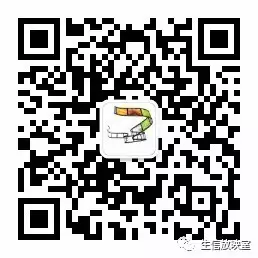